# Project Bank Marketing 
## Introduction
### The data is related with direct marketing campaigns (phone calls) of a  banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

####  Bank client data:
######  Age (numeric)
###### Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
##### Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
##### Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
##### Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
##### Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
##### Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:
###### Contact: contact communication type (categorical:'cellular','telephone')
###### Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
###### Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
###### Duration: last contact duration, in seconds (numeric). Important
###### note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call

##### Other attributes:
##### Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
###### Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
##### Previous: number of contacts performed before this campaign and fort his client (numeric)
###### Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')
###### Social and economic context attributes
##### Emp.var.rate: employment variation rate - quarterly indicator(numeric)
##### Cons.price.idx: consumer price index - monthly indicator (numeric)
###### Cons.conf.idx: consumer confidence index - monthly indicator(numeric)
###### Euribor3m: euribor 3 month rate - daily indicator (numeric)
###### Nr.employed: number of employees - quarterly indicator (numeric)
###### Output variable (desired target):
##### y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### What is the structure of  dataset?

In [4]:
df.shape

(41188, 21)

 > the dataset has 41188 raws and 22 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column age
------------------

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


For column job
------------------

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed    

## Data Cleaning

In [8]:
df['emp.var.rate'] = df['emp.var.rate'].astype(float)
df['cons.price.idx'] = df['cons.price.idx'].astype(float)
df['cons.conf.idx'] = df['cons.conf.idx'].astype(float)
df['euribor3m'] = df['euribor3m'].astype(float)
df['nr.employed'] = df['nr.employed'].astype(float)

In [9]:
df.duplicated().sum()

12

> I have 12 duplicated rows

In [10]:
df.drop_duplicates( inplace = True)

> I removed the 12 rows 

In [11]:
df.shape

(41176, 21)

##### checking Null Values

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

> We Dont have null values in dataset

## Data visualization

In [13]:
#sns.pairplot(df, height=8, aspect=1)

In [14]:
cs=plt.cm.Set1(np.arange(40)/40.)

#### what is the percentage of clients that Subscribed the deposit in the bank ?

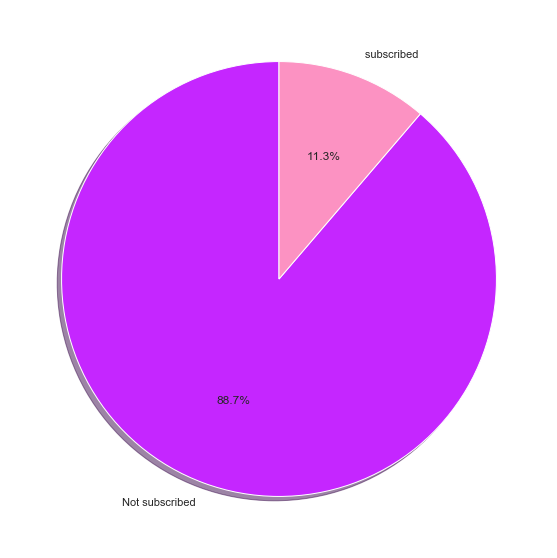

In [15]:
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
######Labels
labels = ["Not subscribed",' subscribed']
### values
values=df['y'].value_counts().values
###plot 
fig1, ax1 = plt.subplots()
###pie chart
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> only 11.3 % from all bank clients subscribed the deposit (unbalanced data)

#### What is the Correlation between features of data ?

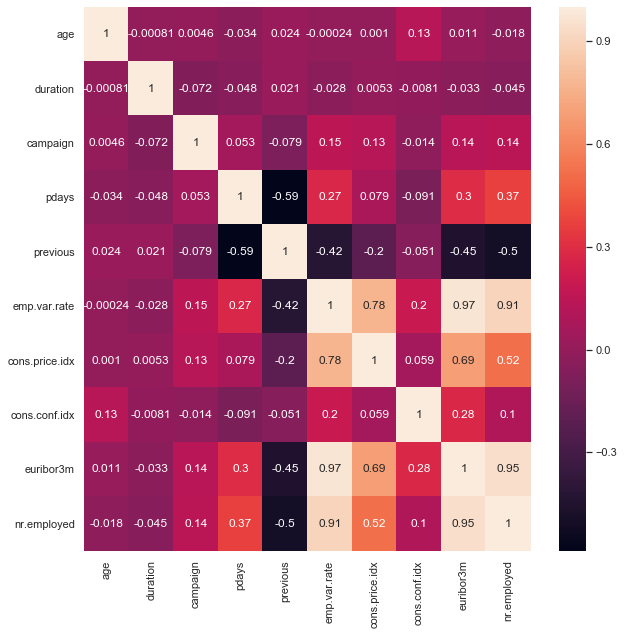

In [16]:
sns.heatmap(df.corr(), annot=True)

##### 1- Strong positive correlation betwen Employment variation rate ( quarterly indicator) and Euribor 3 month rate (daily indicator )
##### 2- Strong positive correlation between euribor 3 month rate (daily indicator ) and number of employees (quarterly indicator )
##### 3- Strong positive correlation betwen Employment variation rate ( quarterly indicator) and number of employees (quarterly indicator )
#### Note : 
##### The EURIBOR is one of the major eurozone intrabank reference interest rates. It is based on a daily survey of the interest rates a panel of major banks would offer other major banks for interbank term deposits

## Clients Features
### - Age

##### What is the distribution of Bank Clients age  ?

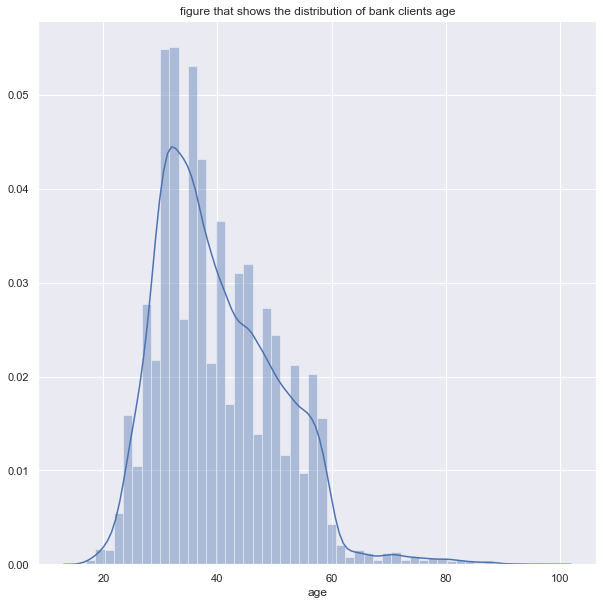

In [17]:
sns.distplot(df['age'],).set_title("figure that shows the distribution of bank clients age");

##### The age of clients is normally distributed and most of ages is between 25 and 60

In [18]:
#dfa=(df['age'] - df['age'].mean())/df['age'].std()  #z-Score
#dfa=np.log10(df['age'])#logn 10 34an 27awl 23dl el curve 

In [19]:
#sns.distplot(dfa)

##### Is the average of clients ages effects on if the the client will subscribe or not ?

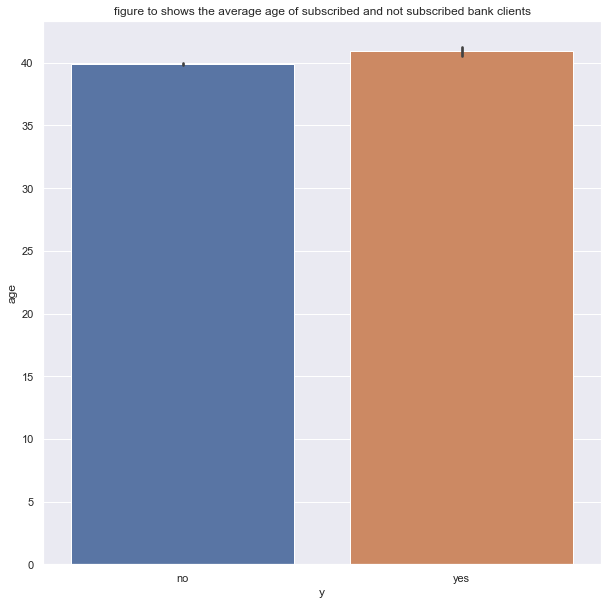

In [20]:
sns.barplot(x="y",y='age',data=df,estimator=np.mean).set_title("figure to shows the average age of subscribed and not subscribed bank clients");

> No great difference between the average age of subscribed clients and not subscribed clients but average of older age subscriberd

### - Job

##### What is highest of three jobs of clients of these jobs subscribed to deposit and what is the lowest ?

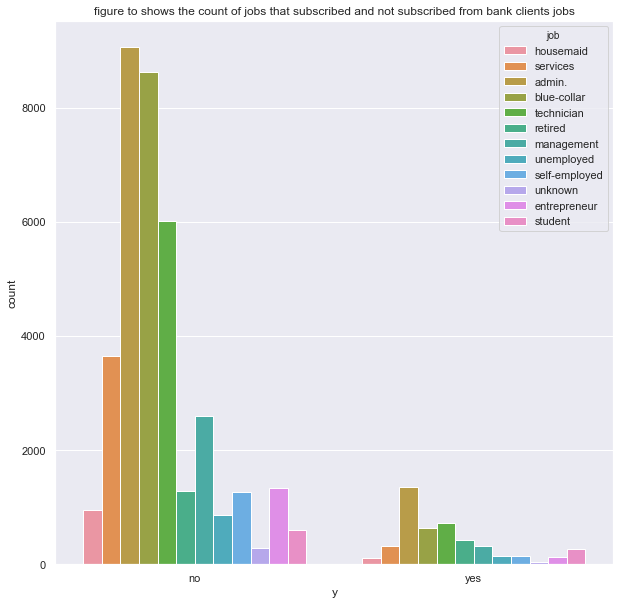

In [21]:
sns.countplot(x='y', data=df,hue='job').set_title("figure to shows the count of jobs that subscribed and not subscribed from bank clients jobs");

#### highest counts of jobs that subscribed to deposite
##### 1- admin
##### 2- technitan
##### 3- blue-collar
#### lowest counts of jobs that not subscribed to deposite
##### 1- unkown
##### 2-housemaid
##### 3-entrepreneur

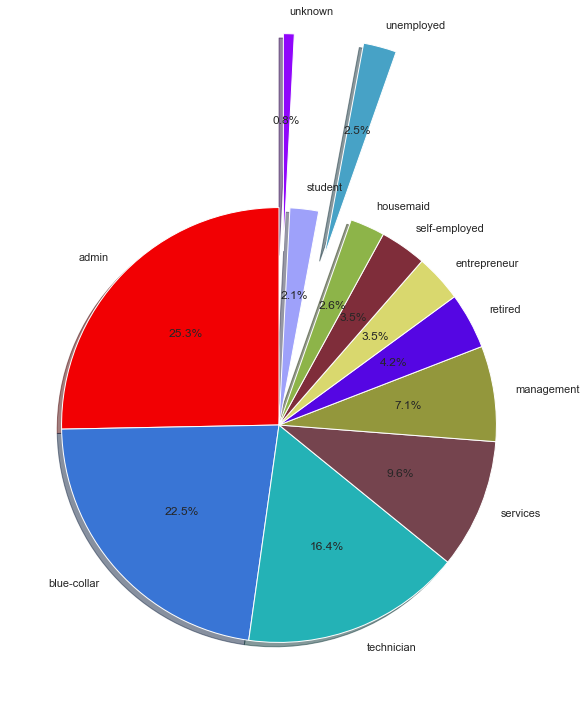

In [22]:
labels = ["admin","blue-collar","technician","services",'management','retired','entrepreneur','self-employed','housemaid','unemployed',
          'student','unknown']
values=df['job'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
myexplode = [0, 0, 0, 0,0,0,0,0,0,0.8,0,0.8]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,explode = myexplode,colors=color)
plt.show()

##### - What is top three ranks of common clients jobs in bank ?
##### Admin job represents 25.3% , blue-collar represents 22.5% and technician represents 16.4 % . 
##### These three jobs represents 64.2 % from clients jobs in bank .

> Note : Admin job reprsents 25.3% from data so it is highest subscribed clients BUT The technician reprsents  only 16.4 %  but it is the scound greatest number of  subscribed  clients  and  blue collar reprsents 22.5 %  from data  is the third >

In [23]:
dftemp=df[(df['job']=='admin.')|(df['job']=='blue-collar')|(df['job']=='technician')][['job','y']]

In [24]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41176


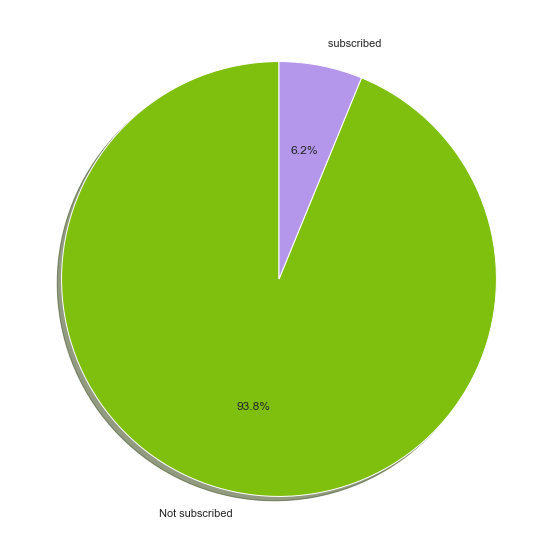

In [25]:
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]

# 34an 25od part y3ne mn piechart bara center 
myexplode = [0, 0, 0, 0,0,0,0,0,0,0.8,0,0.8]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> (admin, blue collar,technician ) represents 64.2% from all jobs but 6.2% from 11.3 %subscribed

# Marital

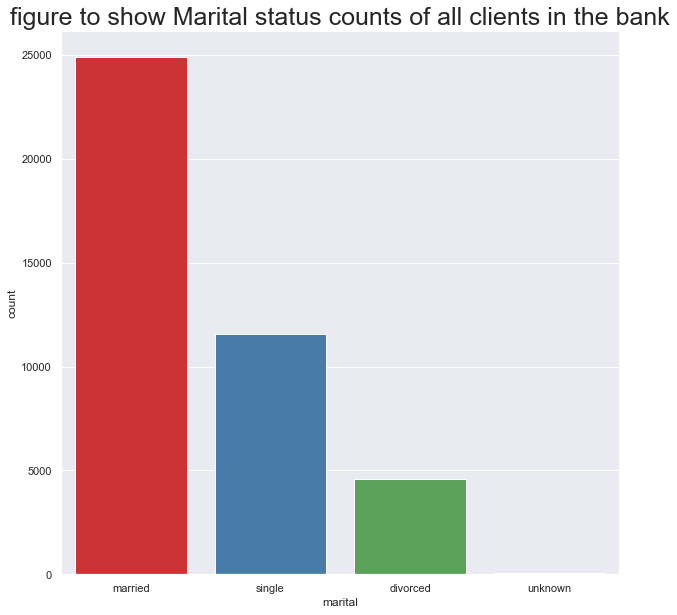

In [26]:
sns.countplot(x='marital', data=df,palette='Set1').set_title('figure to show Marital status counts of all clients in the bank',size=25);

#### Married clients count maybe double the single clients counts
#### Single clients is the secound greates count
#### Divorced is the third greatest count
#### Unkown is the lowest count 

In [27]:
dftemp=df[(df['marital']=='married')][['marital','y']]

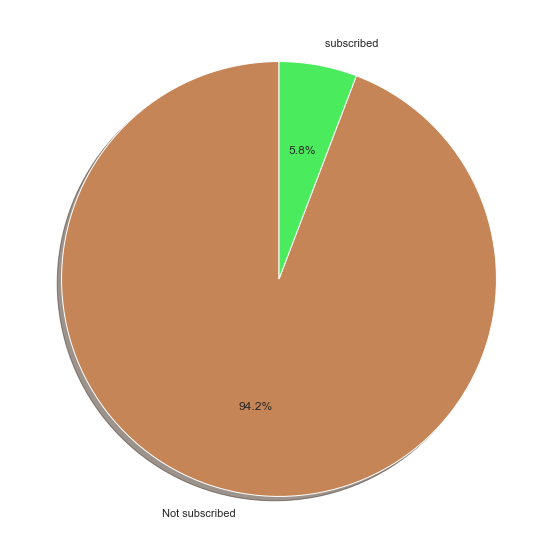

In [28]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> 5.8 % from married clients subscribed from total subscribed clients (11.3%) but married client's represents( 60.5% from total data)

> 10.2 % from total maried clients (60.5 %) subscribed

# Education 

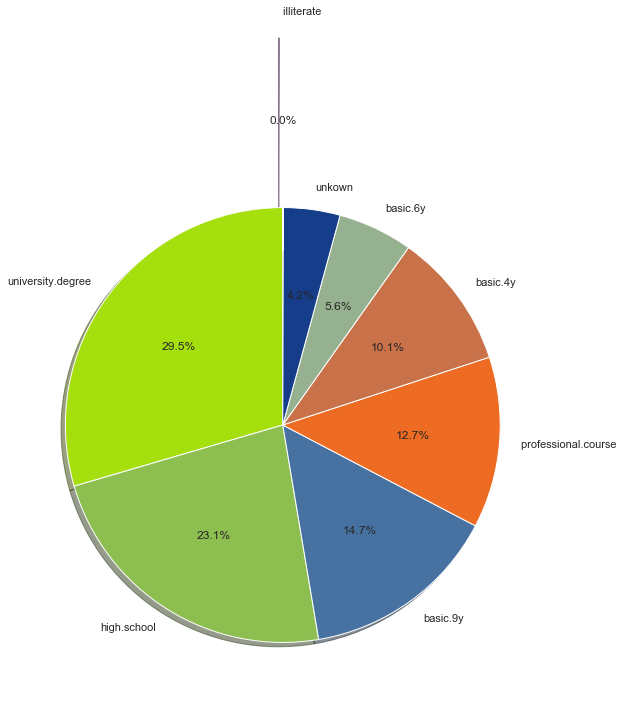

In [29]:
labels = ["university.degree",'high.school','basic.9y','professional.course ','basic.4y','basic.6y','unkown','illiterate ']
myexplode = [0, 0, 0, 0,0,0,0,0.8]
values=df['education'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,explode=myexplode,colors=color)
plt.show()

##### The university degree education reprsents of 29.5 % 
##### 23.1 %from clints graduated from high school
##### university degree and high school reprsents 52.6% mn data 

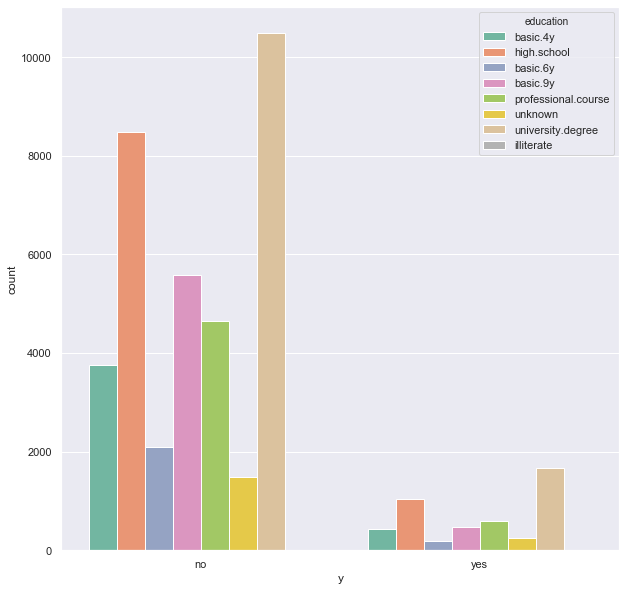

In [30]:
sns.countplot(x='y', data=df,hue='education',palette='Set2')

> universiy degree and el high school educationI greatest count of subscribers

In [31]:
dftemp=df[(df['education']=="university.degree")|(df['education']=="high.school")][['education','y']]

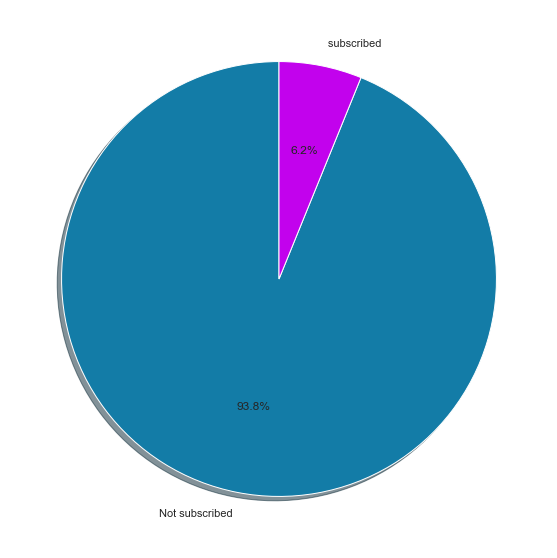

In [32]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> University degree and high school represents 52.6% from data 6.2% from these two educational degrees subscribed total subscribers ( 11.3%)

> 12.5% from 52.6 %(university degree and high school)  subscribed

##### Note :
#####       1- jobs (admin,blue collar and technitans)  reprsents 64.2% --> 6.3%  subscribed from 11.3%
#####       2-  married clients reprsents  60% from data ---->5.8 % subscribed from total subscribers (11.3%)
#####       3- education(university degree and high school ) reprsents 52.6% mn data  6.2% subscribed (important feature)

In [33]:
dftemp=df[((df['job']=='admin.')|(df['job']=='blue-collar')|(df['job']=='technician'))|(df['marital']=='married')|((df['education']=="university.degree")|(df['education']=="high.school"))][['job','marital','education','y']]

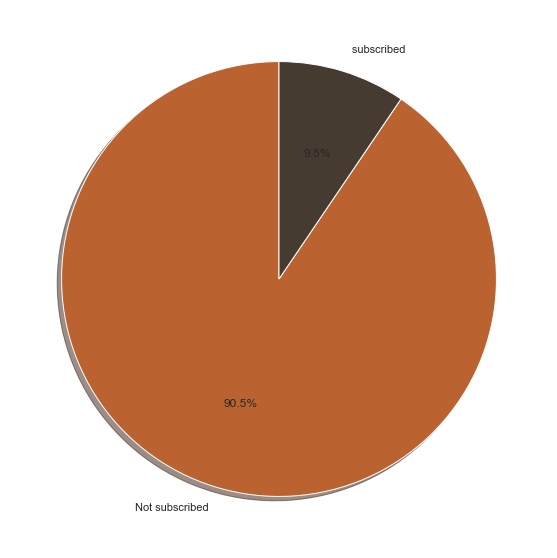

In [34]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> Bank clients el jobs (3 jobs), (married) (8.4%)or graduated from(university,high school)the prcentage of subscribers increased from 8.4% (3 job or married) --->9.5% from  total (11.2%)

# Default 

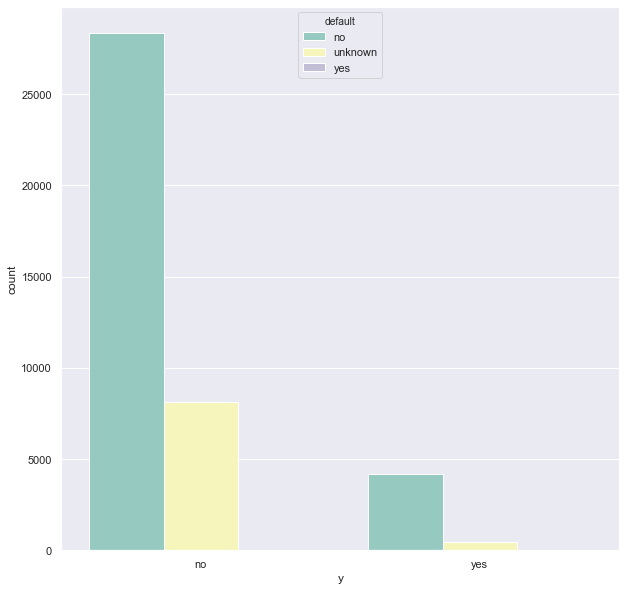

In [35]:
sns.countplot(x='y', data=df,hue='default',palette='Set3')

##### 79.1% from clients has nos credit
##### 20.9% unkown
> it is a huge number of clients are unknown (20.9%) 

In [36]:
dftemp=df[(df['default']=="no")][['default','y']]

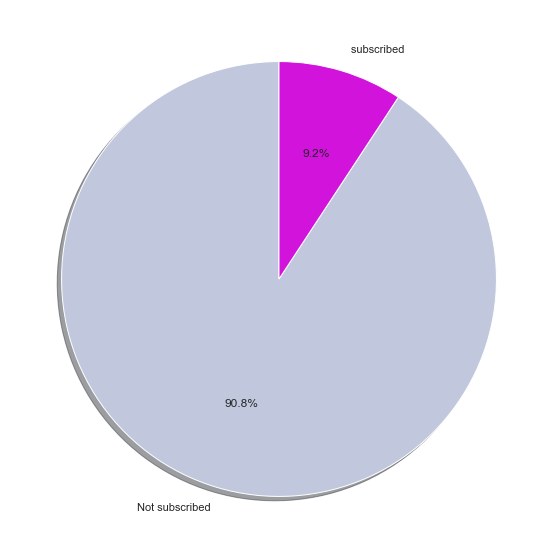

In [37]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

>9.2% from nocredit subscribed (9.2% from 11.2%) w no credit clients (79.1%) 

# housing

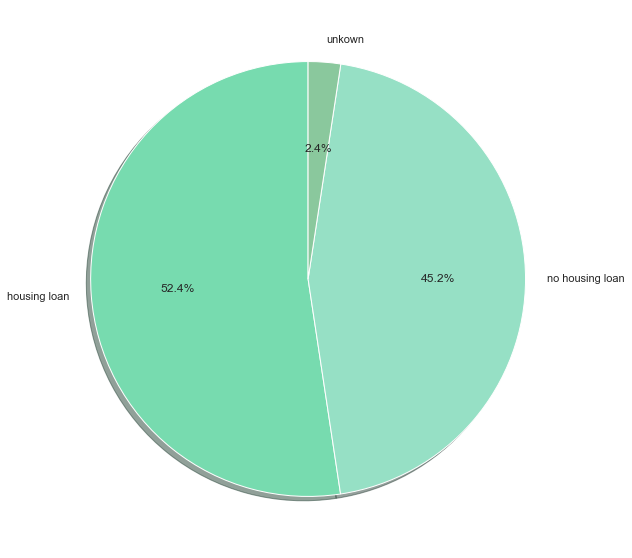

In [38]:
labels = ['housing loan','no housing loan','unkown']
values=df['housing'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### 52.4% from clients have housing loan 
##### 45.2 % from clients not have housing loan 
#####  2.4% unkown

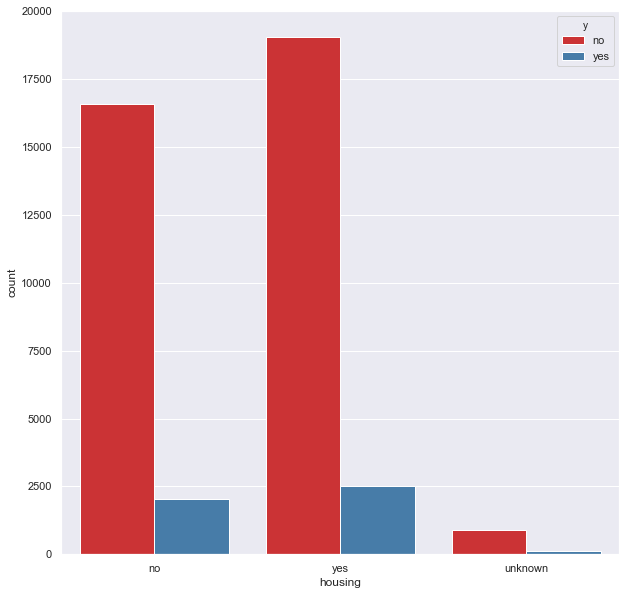

In [39]:
sns.countplot(x='housing', data=df,hue='y',palette='Set1')

In [40]:
dftemp=df[(df['housing']=="yes")][['housing','y']]

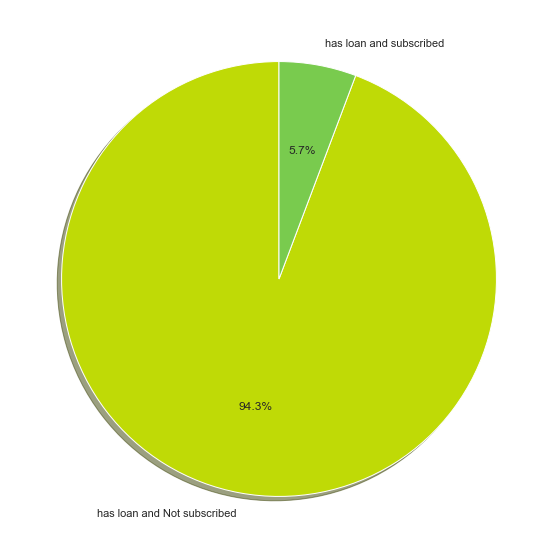

In [41]:
labels = ["has loan and Not subscribed",' has loan and subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### 5.7% from clients has loan and subscribe

In [42]:
dftemp=df[(df['housing']=="no")][['housing','y']]

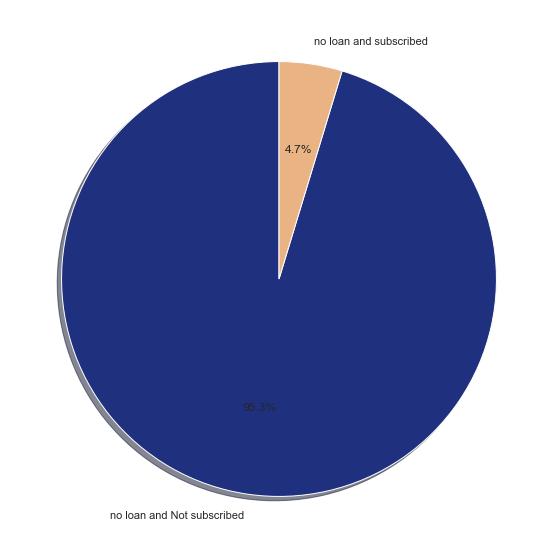

In [43]:
labels = ["no loan and Not subscribed",'no loan and subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> 4.7% from clients  no loans and subscribe

# personal loan

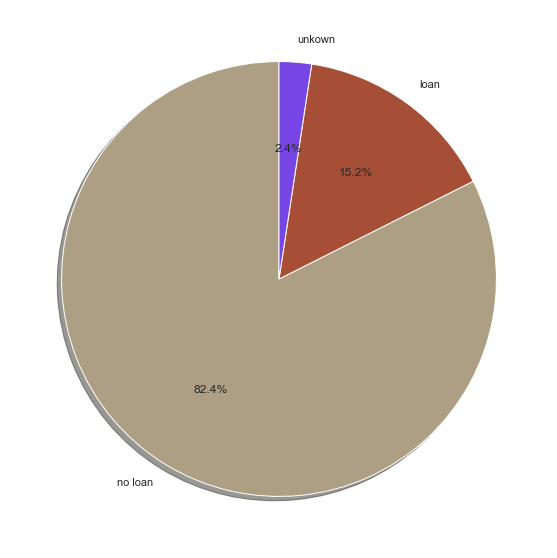

In [44]:
labels = ['no loan','loan','unkown']
values=df['loan'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

###### 82.4% from clients have no personal loan
###### 15.2% from clients  personal loan
###### 2.4% from clients unkown

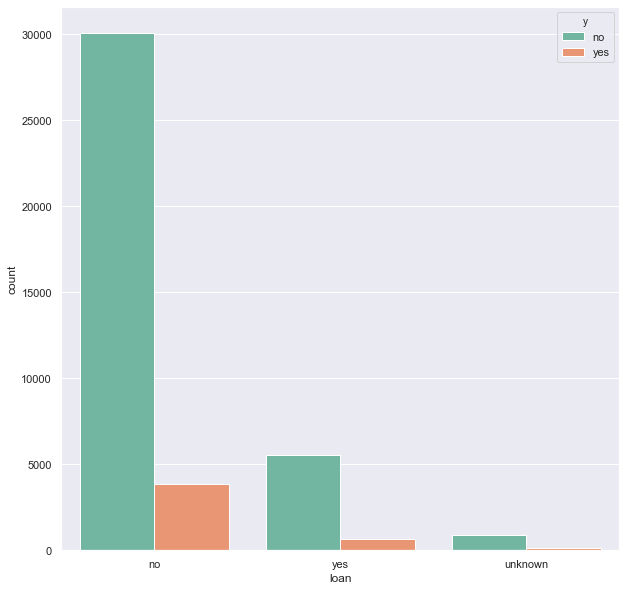

In [45]:
sns.countplot(x='loan', data=df,hue='y',palette='Set2')

>most of Subscribed clients haven't personal loans because they reprsented 82.4% from data

In [46]:
dftemp=df[(df['loan']=="yes")][['loan','y']]

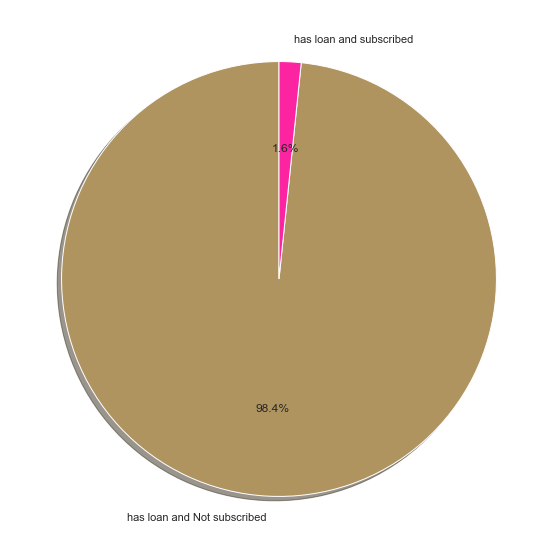

In [47]:
labels = ["has loan and Not subscribed",' has loan and subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### only 1.6% from clients that have loan and subscribed 

In [48]:
dftemp=df[(df['loan']=="no")][['loan','y']]

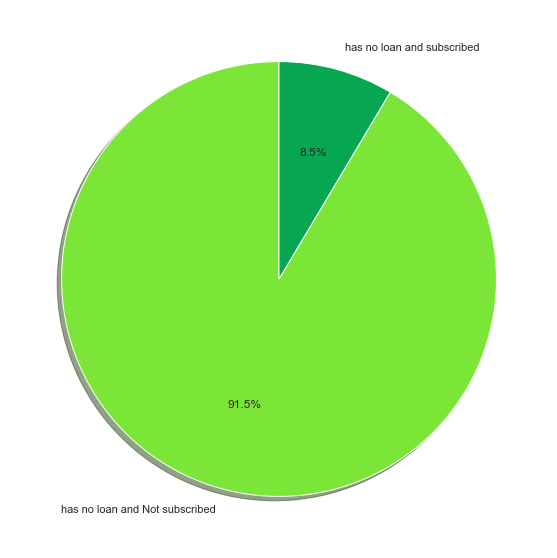

In [49]:
labels = ["has no loan and Not subscribed",' has no loan and subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> 8.5% from clients has no personal loan and subscribed

##### Contact Type

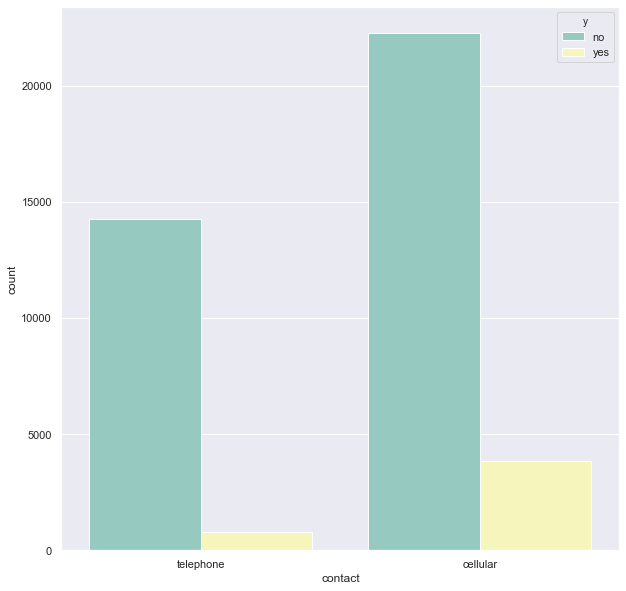

In [50]:
sns.countplot(x='contact', data=df,hue='y',palette='Set3')

>cellular calls reprsents 63.5% and 36.5% telephone

In [51]:
dftemp=df[(df['contact']=='cellular')][['contact','y']]

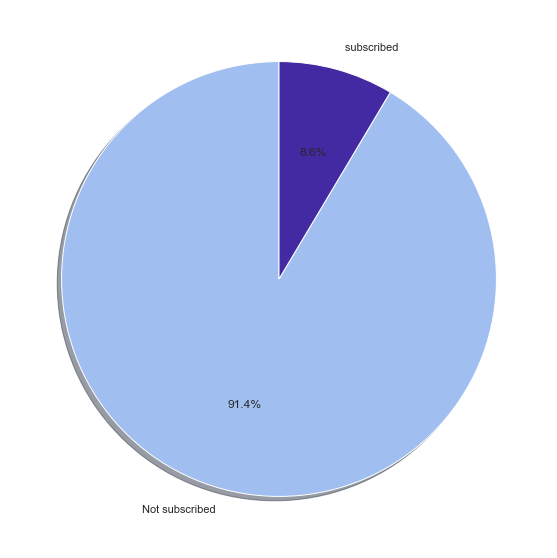

In [52]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

 > 8.6 % subscribed from 11.3% the bank contacted to them using cellular

> Note : probability of clients that subscribed increased to the double when the bank content tto clients by mobile more thyan telephone

## Month

In [53]:
df['month'].value_counts()


may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

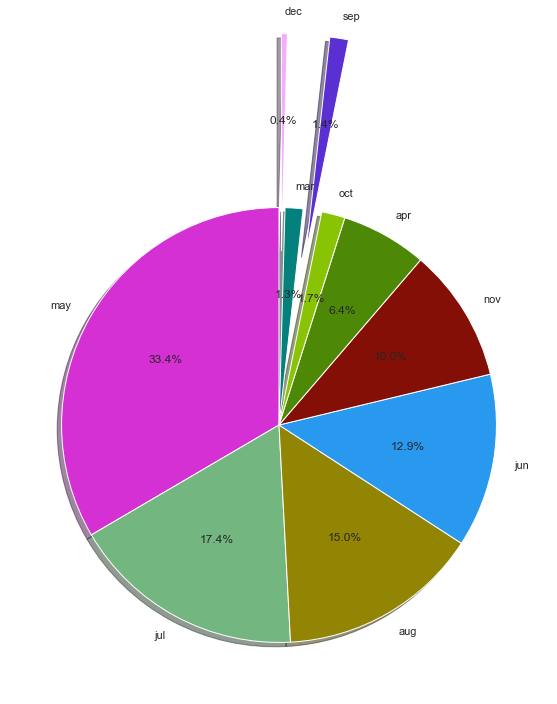

In [54]:
labels = ['may','jul','aug','jun','nov','apr','oct','sep','mar','dec']
values=df['month'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
myexplode = [0, 0, 0, 0,0,0,0,0.8,0,0.8]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,explode=myexplode,colors=color)
plt.show()

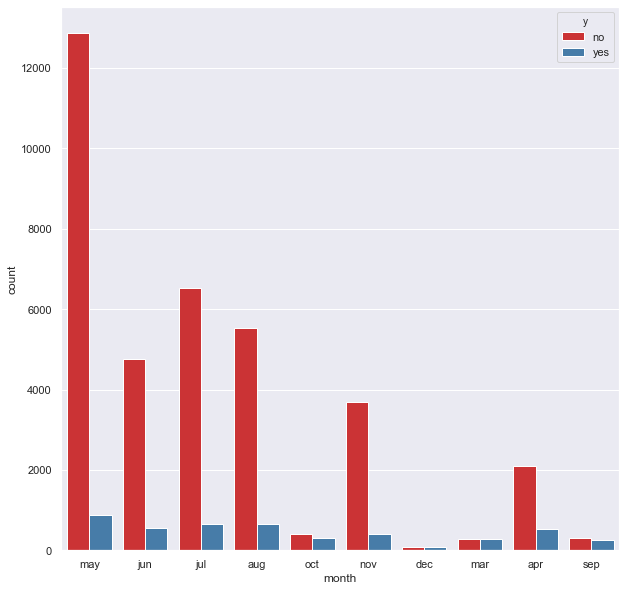

In [55]:
sns.countplot(x='month', data=df,hue='y',palette='Set1')

##### what is most months the bank calls to the clients ?
#### 1-May reprsents 33.4% from last contact
#### 2-july reprsents 17.4% from last contact
#### 3-august aug reprsents 15% from last contact
###  what is lowest months the bank calls to the clients ?
#### 1- dec reprsents 0.4% from last contact
#### 2- march reprsents 1.3 % from last contact
#### 3- sep reprsents 1.4% from last contact

In [56]:
dftemp=df[(df['month']=='may')|(df['month']=='jul')|(df['month']=='aug')][['month','y']]

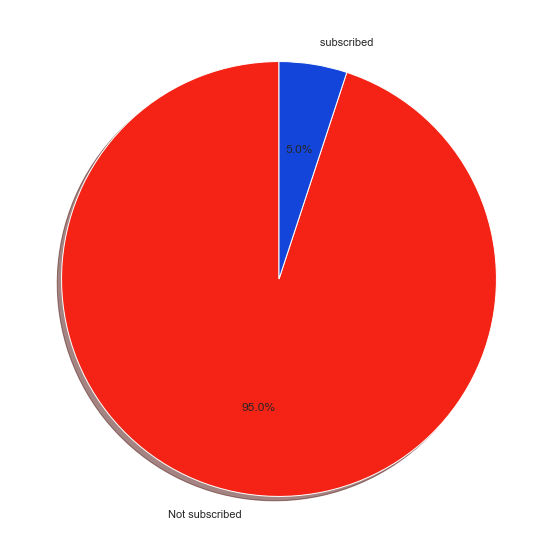

In [57]:
labels = ["Not subscribed",' subscribed']
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]

# 34an 25od part y3ne mn piechart bara center 
myexplode = [0, 0, 0, 0,0,0,0,0,0,0.8,0,0.8]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

#### 65.8% from last contact  7asl f el 3 months doul (may,aug,jul) and these 3 months (only)reprsents 5% from clients subscribe in these 3 months 5% from(11.3%) ( t2reban w dah r2y 34an dah wa2t nas bt7b ttl3 2gzat w tsafer w kada)


In [58]:
dftemp=df[((df['month']=='dec'))][['month','y']]

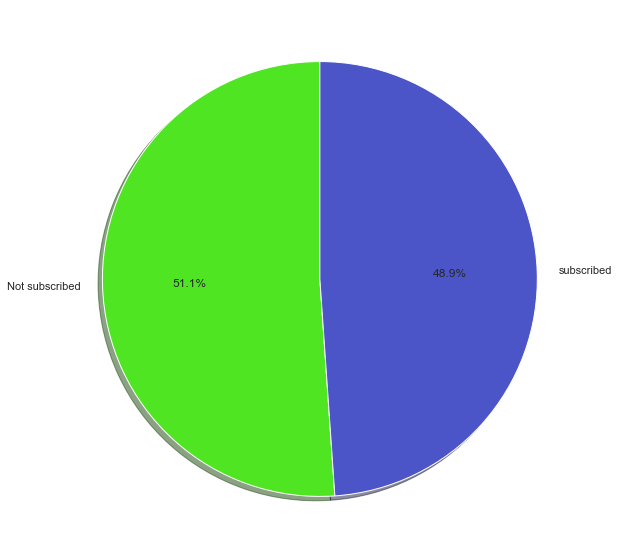

In [59]:
labels = ["Not subscribed",'subscribed']
values=dftemp['y'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> Note : the bank called182 client only 51.1%not subscribed  (93 client)  but  48.9% from this clients subscried (89 client) ( this note is very important to the bank )

## seasons

### Extract season from month

In [60]:
def map_months(x):
    if x in ['dec', 'jan', 'feb']:
        return 'Winter'
    elif x in ['mar', 'apr', 'may']:
        return 'Spring'
    elif x in ['jun', 'jul', 'aug']:
        return 'Summer'
    elif x in ['sep', 'oct', 'nov']:
        return 'Autumn'

df['Season'] = df['month'].apply(map_months)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Season
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Spring


In [61]:
df['Season'].value_counts()

Summer    18663
Spring    16944
Autumn     5387
Winter      182
Name: Season, dtype: int64

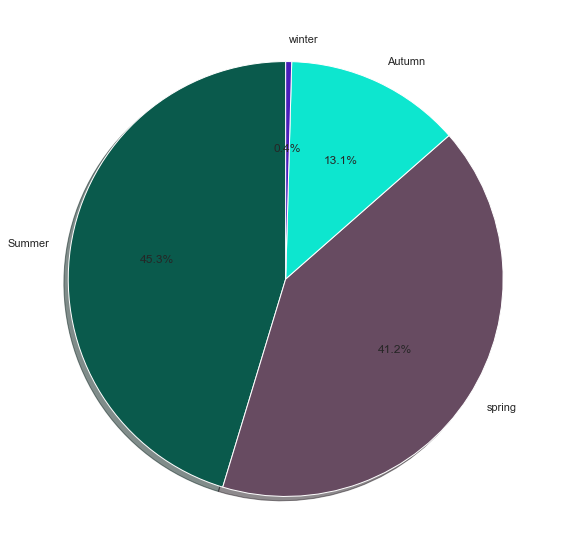

In [62]:
labels = ["Summer",'spring','Autumn','winter']
values=df['Season'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> #### 45.3 % from bank clients called in summer , in spring the bank called 41.1% from bank clients , in autumn the bank called 13.1% from clients and the other 0.4% from clients in winter

#### summer (Season)

In [63]:
dftemp=df[((df['Season']=='Summer'))][['Season','y']]

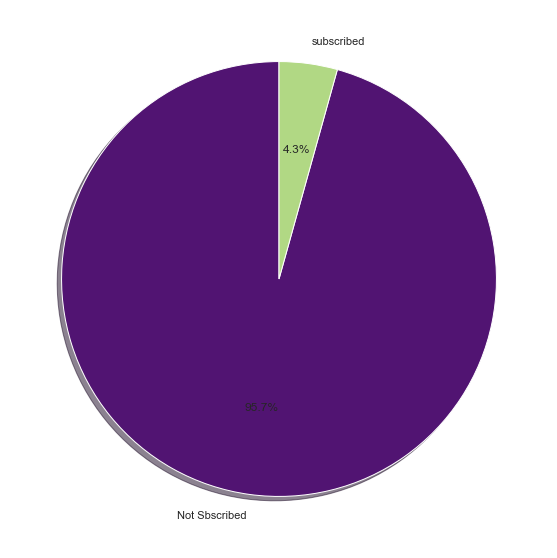

In [64]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

#### 4.3 % from 11.3% subscribed in summer (  summer  reprsents 45.3% )
#### 10% from 45.3% subscribed

In [65]:
dftemp=df[((df['Season']=='Spring'))][['Season','y']]

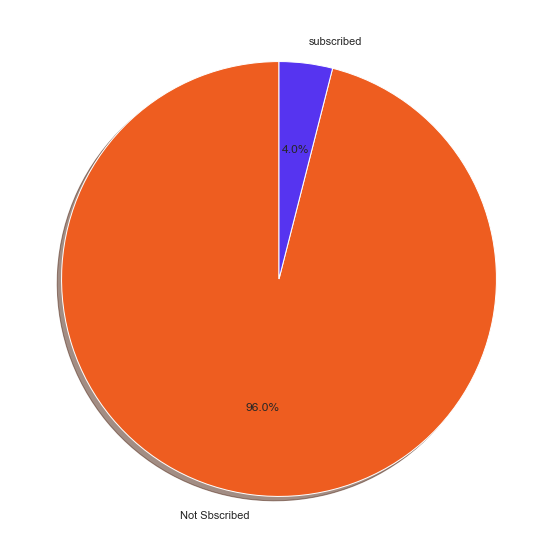

In [66]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### 4% from 11.3% subscribed in spring ( spring reprsents 41.1% )
##### 10% from 41.1% subscribed

In [67]:
dftemp=df[((df['Season']=='Autumn'))][['Season','y']]

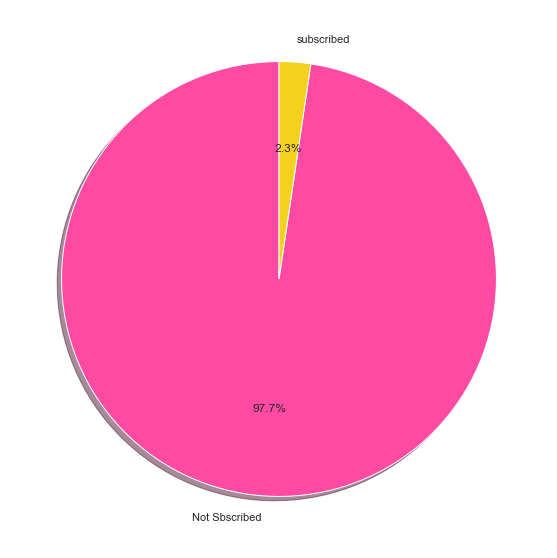

In [68]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

#### 2.3% mn ell 11.3% mn el 3qamlo subscribe kano mn autmun ( w autumn 13.1% mn data kolha w dah 27sn mn el spring  w summer  fe elauatumn mkmloush nos 3add el connection bt3t summeraw el spring bas aktr mmn nos f kol subscribe fehom 3aml subscribe )

##### 2.3% from 11.3% subscribed in autumn( autumn reprsents 13.1% from all data  so probaility to subscribe in autumn is more than spring and summer )
##### 18.3% from the total 13.1% subscribed

In [69]:
dftemp=df[((df['Season']=='Winter'))][['Season','y']]

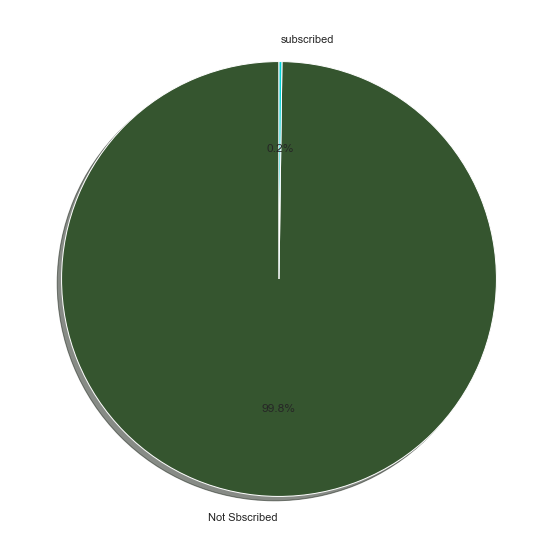

In [70]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### 0.2% from 11.3% subscribed in winter( winter reprsents 0.4% )
##### 48.9% from  0.4% of clients subscribed in winter so :  the bank should be foucs to make more connections in winter bank foucsed his calls in  summer and this days maybe alot of holidays more than the winter

#### Days 

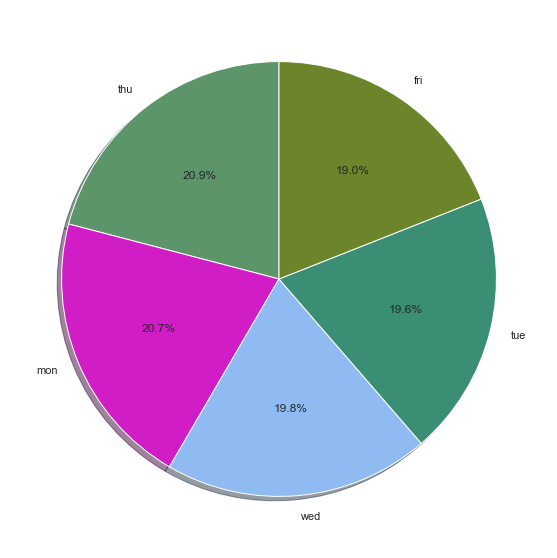

In [71]:
labels = ['thu','mon','wed','tue','fri']
values=df['day_of_week'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
#myexplode = [0, 0, 0, 0,0,0,0,0.8,0,0.8]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

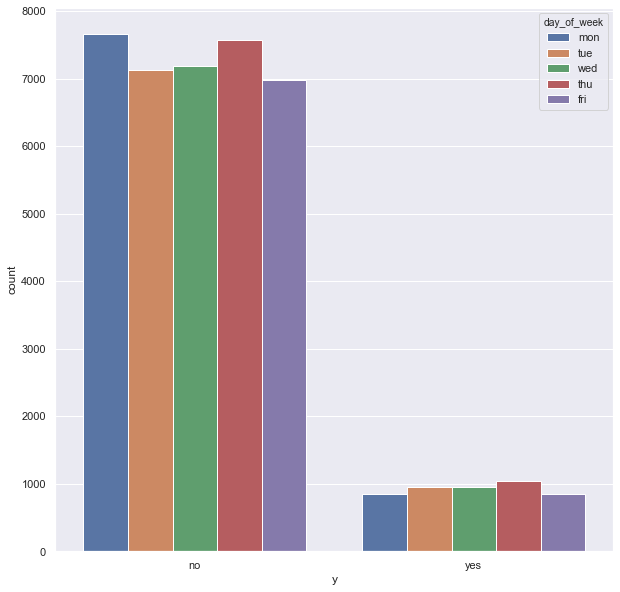

In [72]:
sns.countplot(x='y', data=df,hue='day_of_week')

> No great difference between days and the number of connections with clients and no great difference in dyas that client make subscribed in it

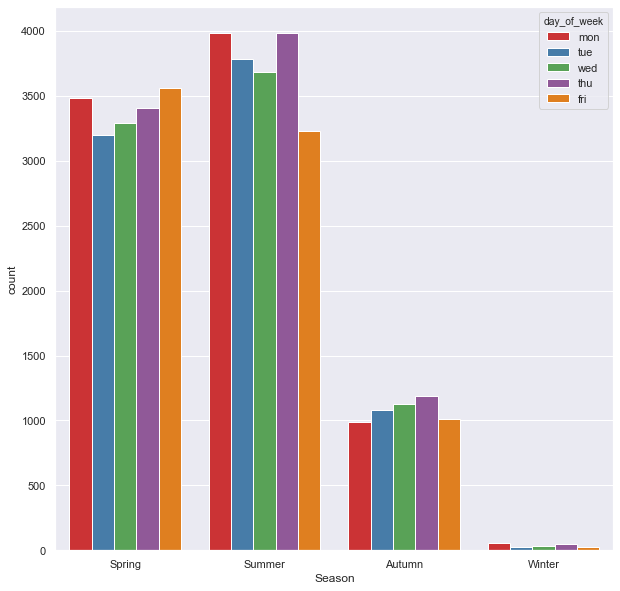

In [73]:
sns.countplot(x='Season', data=df,hue='day_of_week',palette='Set1')

> no great difference between in every season days

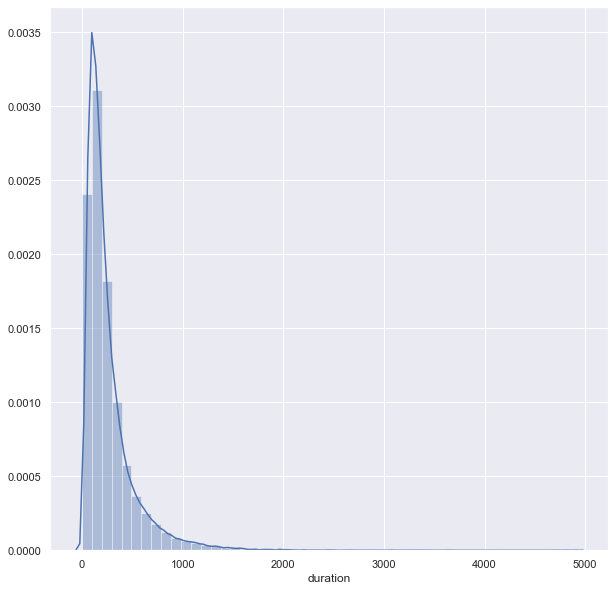

In [74]:
sns.distplot(df['duration'])

### A right skewed distribution and this describes most desired target is no

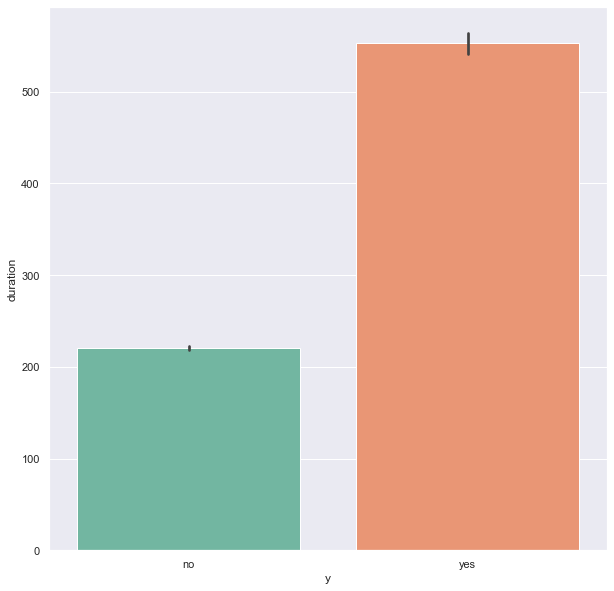

In [75]:
sns.barplot(x="y", y="duration", data=df,palette='Set2')

>if average duration of call increases the probability of client to subscribe will increased

#### Campaign

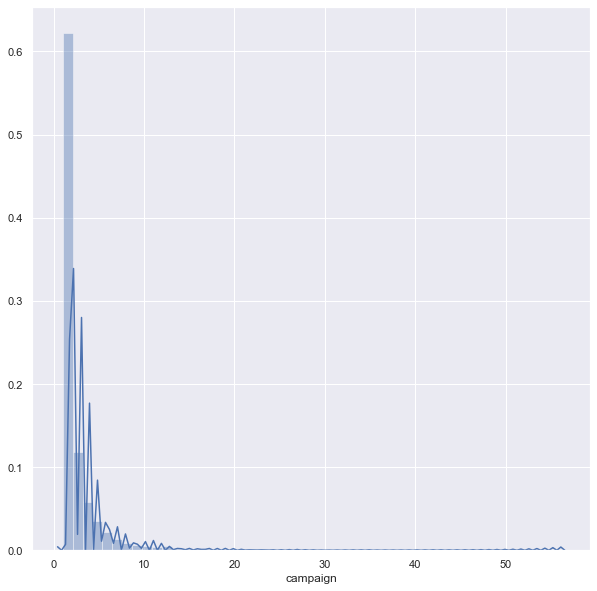

In [76]:
sns.distplot(df['campaign'])

##### right skewed distribution and the most of data number of contacts performed during this campaign between 1 and 3 calls

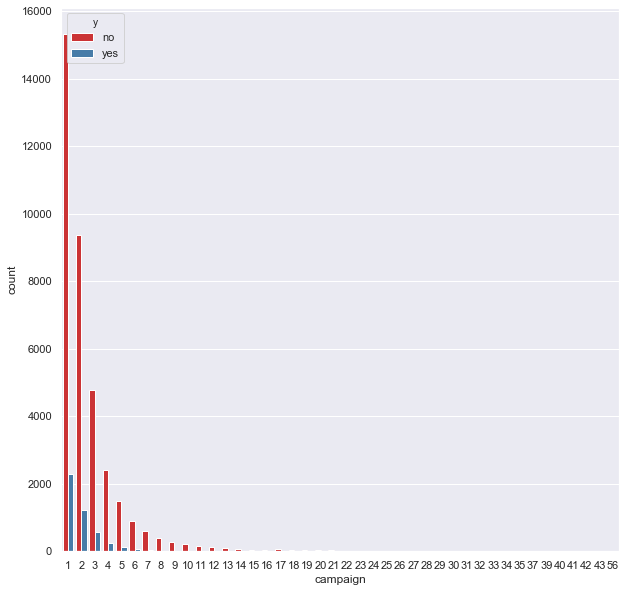

In [77]:
sns.countplot( x="campaign", data=df,hue='y',palette='Set1')

> the data of contatc performed during this campaign and for this client the data is right skewed  number of contactsif number of contacts decreases the probability of clients to subscribe will increase

##### previous days of last campaign

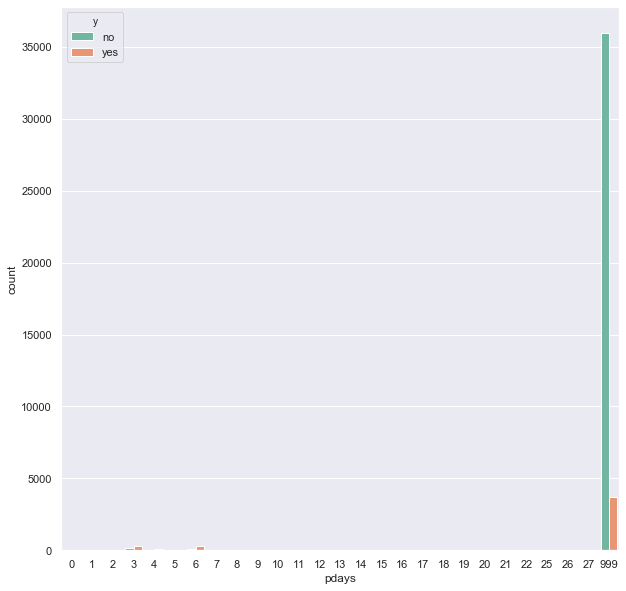

In [78]:
sns.countplot( x="pdays",data=df,hue='y',palette='Set2')

##### more than  37000 from clients no contacts performed before the campaign 


> Note : if bank make a contact beforen last campaign b more than 3 or 6 days the probability of client to subscribe will increased 

##### previous las contact

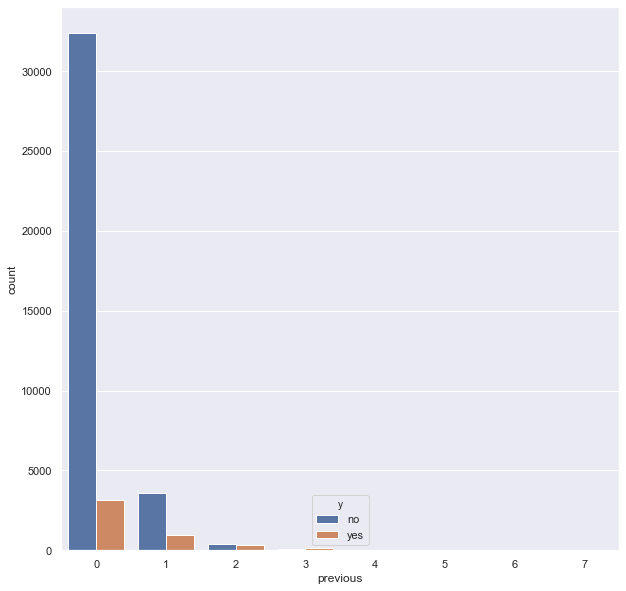

In [79]:
sns.countplot( x="previous",data=df,hue='y')

> Note : every time the bank contact with clients the probability of the client to unsbscribe decreased and probability to subscribe increase 

##### outcome of the previous marketing campaign

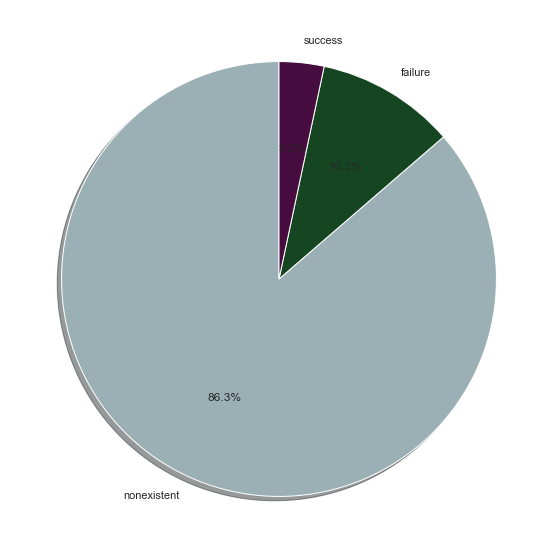

In [80]:
labels = ["nonexistent","failure",'success']
values=df['poutcome'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

##### 86.3% from clients non existant 
##### 10.3% from clients failure and not subscribed  for last campaigns
##### 3.3% from clients subscribed in last campaigns 

In [81]:
dftemp=df[((df['poutcome']=='nonexistent'))][['poutcome','y']]

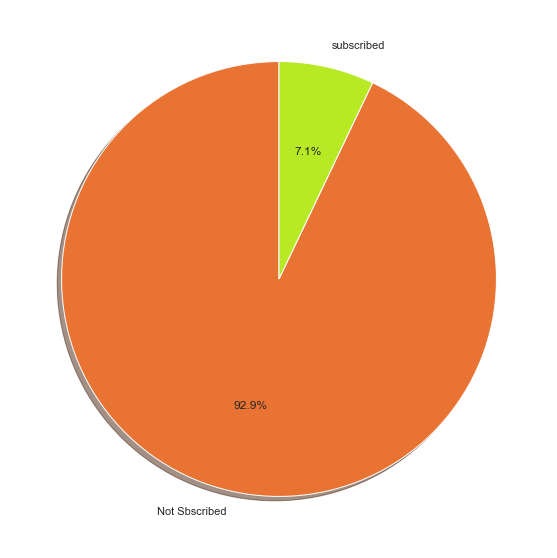

In [82]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

>7.1 % from 11.3% subscribed but no cntact occuerd bertween bank and client for any campaign befor  and this is large number from data 86.3% 

> 8.8% mn 86.3% clients  subscribed without any contactsto join any campaign

In [83]:
dftemp=df[((df['poutcome']=='failure'))][['poutcome','y']]

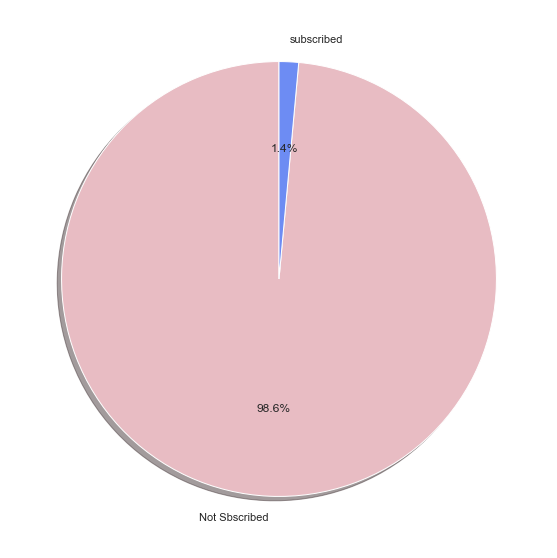

In [84]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

>1.4 % from 11.3%  first time subscribed in any campaign and they reprsent 10.3%  from all data

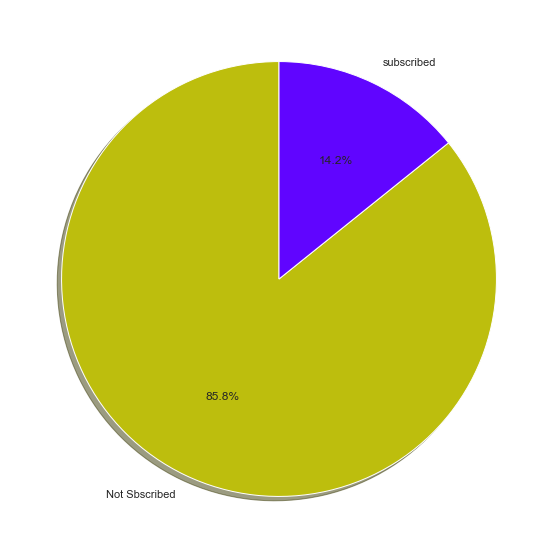

In [85]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

> 14.2% from total 10.3%  from clients changes and  subscribe after they refused to subscribe brfore in last  campaign and this good point for bank 

In [86]:
dftemp=df[((df['poutcome']=='success'))][['poutcome','y']]

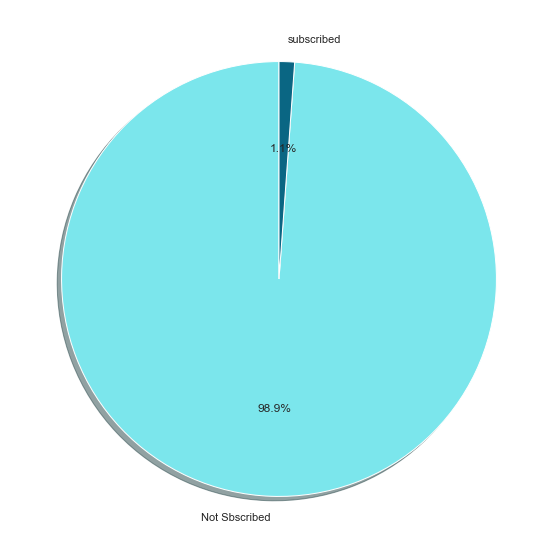

In [87]:
labels = ["Not Sbscribed","subscribed"]
values=dftemp['y'].value_counts().values
values[0]=41188
####colors
n = 100
color = ["#" + ''.join([random.choice('0123456789ABCDEF')for j in range(6)]) for i in range(n)]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=color)
plt.show()

>  1.1 % from all 11.3% subscribed again after  subscribe  in other campaigns and this reprsents 3.3% from all data ( this great prcentage   because this lowest prcentage in data)

>  65.1% from  all 3.3%subscribed again to the campaign after subscribing in last campaigns (but they lose last subscribed clients  35% in othercampaigns (because i think outcome not like the expectationsof the clients))

###  employment variation rate

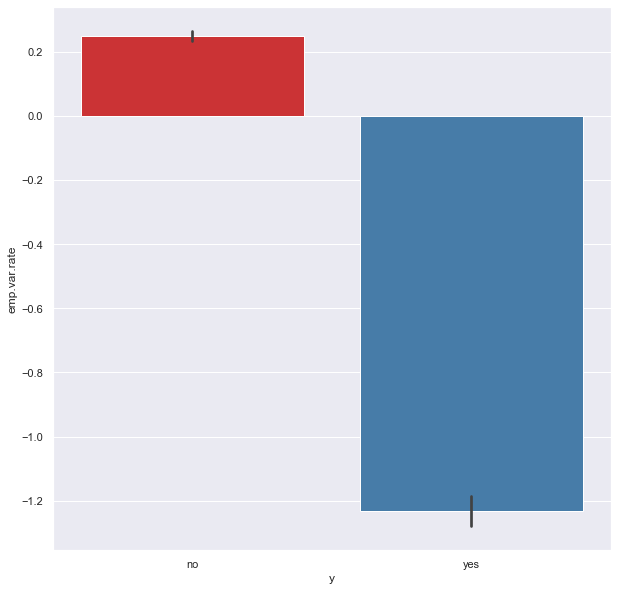

In [88]:
sns.barplot( x="y",y='emp.var.rate',data=df,palette='Set1')

> when employment variation rate average increased the clients not subscribed

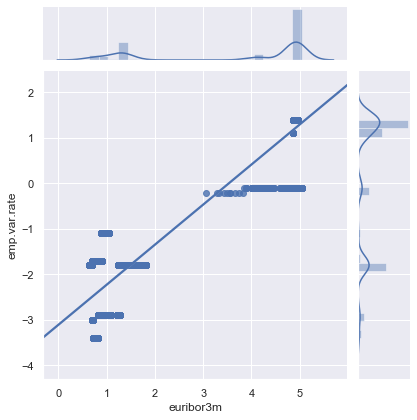

In [89]:
sns.jointplot(x="euribor3m", y="emp.var.rate", data=df, kind='reg')
#sns.jointplot(x="age", y="duration", data=df, kind='reg')


### Strong positive correlation betwen  Employment variation rate ( quarterly indicator) and Euribor 3 month rate (daily indicator )
#### Note : 
##### The EURIBOR is one of the major eurozone intrabank reference interest rates. It is based on a daily survey of the interest rates a panel of major banks would offer other major banks for interbank term deposits

#### consumer price index

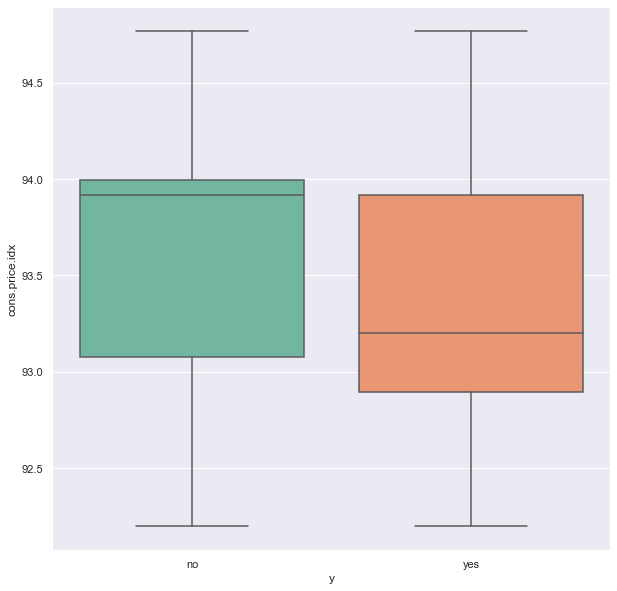

In [90]:
sns.boxplot( x="y",y='cons.price.idx',data=df,palette='Set2')

##### if the average of consumer price index increased  maybe the clients not subscribde  (y3ne flous el bttsrf ktear )
##### so the bank lshould foucs the averege of consumer price index because if this rate decreased  the probability of client will subscribe will increased

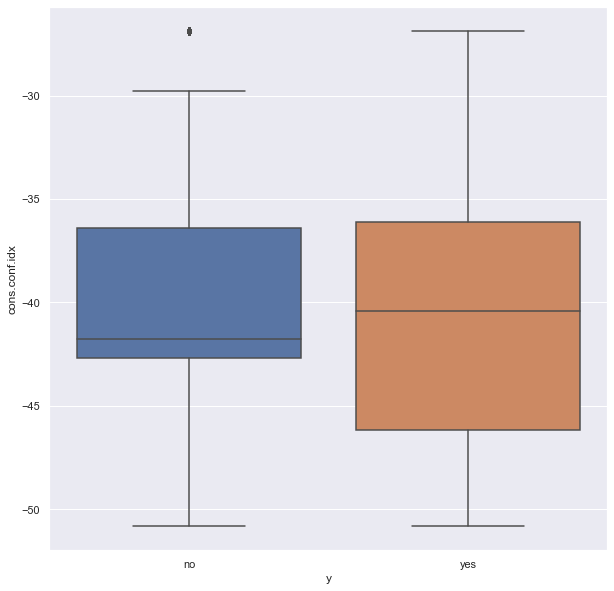

In [91]:
sns.boxplot( x="y",y='cons.conf.idx',data=df)

##### if average  consumer confidence index increased the probability of clients to subscribe will increased  (clients will subscribe 3because when confidence incread they will subscribed)
##### bank should foucs on averege of consumer confidence index because when the decreased the rate of subscribtion will decreased 

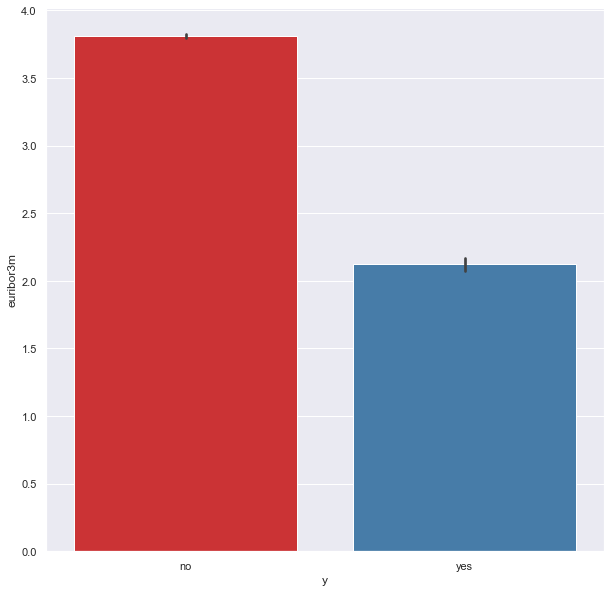

In [92]:
sns.barplot( x="y",y='euribor3m',data=df,estimator=np.mean,palette='Set1')


##### when  EURIBOR  average rate increased number of subscribed clients decreased

##### The EURIBOR is one of the major eurozone intrabank reference interest rates. It is based on a daily survey of the interest rates a panel of major banks would offer other major banks for interbank term deposits

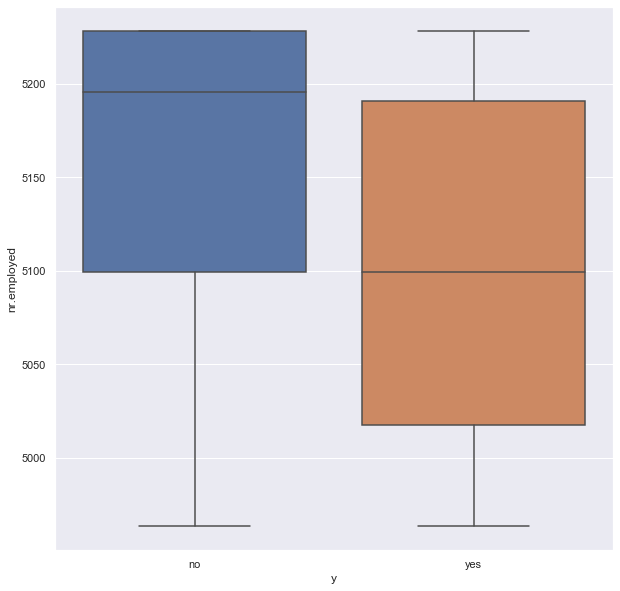

In [93]:
sns.boxplot( x="y",y='nr.employed',data=df)

> when average number of empolyez rate increase the number of no subscriber increased

### Data preprocessing

#### Working with categorical data

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [95]:
df1=df

In [96]:
look_up = {'jan':1, 'feb':2, 'mar':3, 'apr':4,'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

In [97]:
df1['month'] = df1['month'].apply(lambda x: look_up[x])

In [98]:
df1 = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default','housing','loan','contact',
                                 'day_of_week','poutcome'], drop_first=True)

In [99]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [100]:
df1['y']= label_encoder.fit_transform(df1['y'])

In [101]:
df1.head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,housing_yes,loan_unknown,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,5,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,1,0,0,0,1,0
1,57,5,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,1,0,0,0,1,0
2,37,5,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,1,1,0,0,0,1,0
3,40,5,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,1,0,0,0,1,0
4,56,5,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,1,1,0,0,0,1,0


In [102]:
x = df1.drop(['y','Season'], axis=1)
y = df1['y']

In [103]:
all_features=x.columns
all_features

Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [104]:
selector = SelectPercentile(percentile=50, score_func=f_classif)

In [105]:
selector.fit(x, y)

SelectPercentile(percentile=50)

In [106]:
selector.scores_

array([3.80377622e+01, 5.70874148e+01, 8.09286433e+03, 1.82121625e+02,
       4.86086431e+03, 2.30402043e+03, 4.02129830e+03, 7.77463752e+02,
       1.24027852e+02, 4.30726455e+03, 5.92452914e+03, 2.29376610e+02,
       1.14189227e+01, 1.74507664e+00, 7.48564000e-03, 3.54282693e+02,
       8.97288526e-01, 4.29012634e+01, 3.66756502e+02, 1.51679588e+00,
       8.95903716e+00, 9.75712585e-04, 7.79721978e+01, 1.21348959e+02,
       1.11774254e+00, 2.27378881e+01, 8.41148847e+01, 2.25950588e+00,
       2.16219716e+00, 4.72397514e-02, 1.04302143e+02, 1.89989887e+01,
       4.10082605e+02, 3.80914327e-01, 2.13014671e-01, 5.73803422e+00,
       2.13014671e-01, 8.25719159e-01, 8.81464614e+02, 1.85852813e+01,
       7.83940388e+00, 2.71670625e+00, 1.62882745e+00, 1.60199957e+03,
       4.57726179e+03])

In [107]:
pd.DataFrame(selector.scores_, index=x.columns)

,0
age,38.037762
month,57.087415
duration,8092.864331
campaign,182.121625
pdays,4860.864315
previous,2304.020429
emp.var.rate,4021.298297
cons.price.idx,777.463752
cons.conf.idx,124.027852
euribor3m,4307.264549


In [108]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 17, 18, 22, 23, 26,
       30, 32, 38, 43, 44], dtype=int64)

In [109]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['month', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_retired', 'job_services', 'job_student',
       'marital_married', 'marital_single', 'education_basic.9y',
       'education_university.degree', 'default_unknown', 'contact_telephone',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

####### df2=df1[['month', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown','default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes','contact_telephone', 'poutcome_nonexistent',
       'poutcome_success', 'Season_Spring', 'Season_Summer', 'Season_Winter']]


In [110]:
x=x[[ 'age','month','campaign','pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown','default_unknown',
       'default_yes','contact_telephone', 'poutcome_nonexistent',
       'poutcome_success']]

In [111]:
x.head()

,age,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_blue-collar,...,job_services,job_student,job_technician,job_unemployed,job_unknown,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
1,57,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,1,0,0,0,0,0,0,1,1,0
3,40,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,1,0,0,0,0,0,0,1,1,0


In [112]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

#### Working with unbalanced class

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [114]:
training_data = pd.concat([x_train, y_train], axis=1)
training_data

,age,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_blue-collar,...,job_student,job_technician,job_unemployed,job_unknown,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y
17254,58,7,30,999,0,1.4,93.918,4.962,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
6276,37,5,2,999,0,1.1,93.994,4.857,5191.0,0,...,0,1,0,0,0,0,1,1,0,0
20010,32,8,3,999,0,1.4,93.444,4.966,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
6661,39,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,0,0,0,0,0,0,1,1,0,0
29559,33,4,1,999,0,-1.8,93.075,1.405,5099.1,1,...,0,0,0,0,0,0,0,1,0,0
35353,29,5,2,999,1,-1.8,92.893,1.250,5099.1,0,...,0,0,0,0,0,0,0,0,0,0
16816,31,7,1,999,0,1.4,93.918,4.962,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
6796,36,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,0,0,0,0,0,0,1,1,0,0
36303,47,6,1,999,0,-2.9,92.963,1.266,5076.2,0,...,0,0,0,0,0,0,0,1,0,0
27939,28,3,2,999,0,-1.8,92.843,1.531,5099.1,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
from sklearn.utils import resample
notSubscribed = training_data[training_data['y'] == 0]
subscribed = training_data[training_data['y'] == 1]

# upsample minority
subscribed_upsampled = resample(subscribed,
                          replace=True, # sample with replacement
                          n_samples=len(notSubscribed), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([notSubscribed, subscribed_upsampled])

# check new class counts
upsampled['y'].value_counts()

1    27408
0    27408
Name: y, dtype: int64

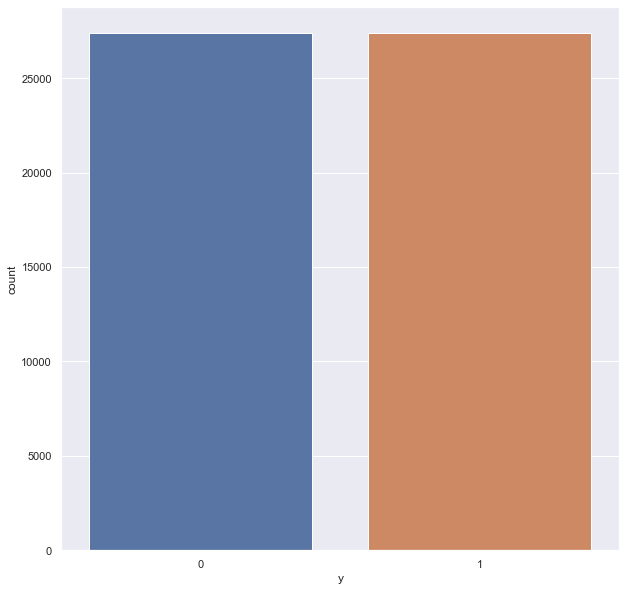

In [116]:
sns.countplot(upsampled['y'])

In [117]:
upsampled.head()

,age,month,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_blue-collar,...,job_student,job_technician,job_unemployed,job_unknown,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y
17254,58,7,30,999,0,1.4,93.918,4.962,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
6276,37,5,2,999,0,1.1,93.994,4.857,5191.0,0,...,0,1,0,0,0,0,1,1,0,0
20010,32,8,3,999,0,1.4,93.444,4.966,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
6661,39,5,1,999,0,1.1,93.994,4.857,5191.0,0,...,0,0,0,0,0,0,1,1,0,0
29559,33,4,1,999,0,-1.8,93.075,1.405,5099.1,1,...,0,0,0,0,0,0,0,1,0,0


In [118]:
len(upsampled)

54816

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()

In [120]:
x = upsampled.drop('y', axis=1)
y = upsampled['y']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

### logistic regression

In [122]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [123]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [124]:
model.fit(x_train, y_train)

LogisticRegression()

In [125]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [126]:
y_test

27767    1
16166    0
24368    0
33904    0
26106    0
36662    1
33666    1
36181    1
29169    0
33776    0
20995    1
41158    1
9297     0
19419    0
8230     0
36043    0
25454    0
38666    1
28589    1
35833    1
38595    1
1603     0
31896    1
12686    0
7024     0
19703    1
38190    1
15891    1
38864    0
18699    0
        ..
2104     1
34094    1
37165    1
27906    0
38495    1
38055    1
39086    1
27707    1
40684    1
21824    0
16530    0
37904    1
37134    0
28367    0
23703    0
16863    0
26466    0
29808    1
28990    1
35182    1
40487    1
1760     0
39691    1
14429    0
28956    1
16615    0
37827    1
13334    0
5514     0
2829     0
Name: y, Length: 13704, dtype: int32

In [127]:
accuracy_score(y_test, y_pred)

0.7324138937536485

In [128]:
confusion_matrix(y_test, y_pred)

array([[5450, 1367],
       [2300, 4587]], dtype=int64)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6817
           1       0.77      0.67      0.71      6887

    accuracy                           0.73     13704
   macro avg       0.74      0.73      0.73     13704
weighted avg       0.74      0.73      0.73     13704



#### KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [131]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [132]:
accuracy_score(y_test, y_pred)

0.7324138937536485

In [133]:
confusion_matrix(y_test, y_pred)

array([[5450, 1367],
       [2300, 4587]], dtype=int64)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6817
           1       0.77      0.67      0.71      6887

    accuracy                           0.73     13704
   macro avg       0.74      0.73      0.73     13704
weighted avg       0.74      0.73      0.73     13704



#### Decision tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [136]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [137]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [138]:
accuracy_score(y_test, y_pred)

0.9286339754816112

In [139]:
confusion_matrix(y_test, y_pred)

array([[5910,  907],
       [  71, 6816]], dtype=int64)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      6817
           1       0.88      0.99      0.93      6887

    accuracy                           0.93     13704
   macro avg       0.94      0.93      0.93     13704
weighted avg       0.94      0.93      0.93     13704



### Random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [142]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [143]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [144]:
accuracy_score(y_test, y_pred)

0.9445417396380619

In [145]:
confusion_matrix(y_test, y_pred)

array([[6118,  699],
       [  61, 6826]], dtype=int64)

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      6817
           1       0.91      0.99      0.95      6887

    accuracy                           0.94     13704
   macro avg       0.95      0.94      0.94     13704
weighted avg       0.95      0.94      0.94     13704



In [147]:
#print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

In [148]:
from xgboost import plot_importance
# import XGBClassifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=100)

xgb_clf.fit(x_train, y_train)

[13:54:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
# make predictions on test data
y_pred = xgb_clf.predict(x_test)

In [150]:
accuracy_score(y_test, y_pred)

0.8037069468768243

In [151]:
confusion_matrix(y_test, y_pred)

array([[5933,  884],
       [1806, 5081]], dtype=int64)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      6817
           1       0.85      0.74      0.79      6887

    accuracy                           0.80     13704
   macro avg       0.81      0.80      0.80     13704
weighted avg       0.81      0.80      0.80     13704



### Random forest model

In [158]:
model = RandomForestClassifier()

In [159]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [160]:
accuracy_score(y_test, y_pred)

0.9436660828955049

In [161]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [162]:
y_test

27767    1
16166    0
24368    0
33904    0
26106    0
36662    1
33666    1
36181    1
29169    0
33776    0
20995    1
41158    1
9297     0
19419    0
8230     0
36043    0
25454    0
38666    1
28589    1
35833    1
38595    1
1603     0
31896    1
12686    0
7024     0
19703    1
38190    1
15891    1
38864    0
18699    0
        ..
2104     1
34094    1
37165    1
27906    0
38495    1
38055    1
39086    1
27707    1
40684    1
21824    0
16530    0
37904    1
37134    0
28367    0
23703    0
16863    0
26466    0
29808    1
28990    1
35182    1
40487    1
1760     0
39691    1
14429    0
28956    1
16615    0
37827    1
13334    0
5514     0
2829     0
Name: y, Length: 13704, dtype: int32